In [3]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt



def Q_learning(env, alpha, gamma, eps, episodes, steps, rewards, states, actions):
    q_table = np.zeros((states, actions))
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        step = 0
        total_reward = 0
        
        for step in range(steps):
            if random.uniform(0, 1) < eps:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
        
            next_state, reward, done, info = env.step(action)
            
            if reward == -1:
                reward = 0
            
            q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[next_state, :].max()\
                                        - q_table[state, action])
            state = next_state
            total_reward += reward
        
            if done:
                break
    
        rewards[episode] = total_reward

In [4]:
def Sarsa(env, alpha, gamma, eps, episodes, steps, rewards, states, actions, q_table):
    for episode in range(episodes):
        state = env.reset()
        done = False
        step = 0
        total_reward = 0
        
        if random.uniform(0, 1) < eps:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        for step in range(steps):
            next_state, reward, done, info = env.step(action)
            
            if random.uniform(0, 1) < eps:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state])
                
            q_table[state, action] = q_table[state, action] + alpha * (reward + \
                                        gamma * q_table[next_state, next_action] - q_table[state, action])
            
            state = next_state
            action = next_action
            total_reward += reward
            
            if done:
                break
            
        rewards[episode] = total_reward

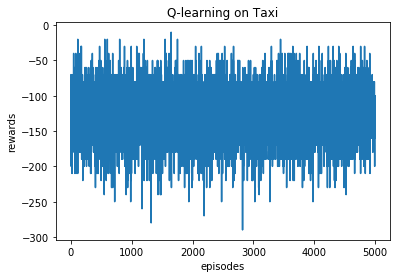

In [5]:
env = gym.make('Taxi-v2')
alpha = 0.7
gamma = 0.95
eps = 0.2
episodes = 5000
steps = 5000
rewards = [0] * episodes
Q_learning(env, alpha, gamma, eps, episodes, steps, rewards, env.observation_space.n, env.action_space.n)

plt.plot(rewards)
plt.title('Q-learning on Taxi')
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()

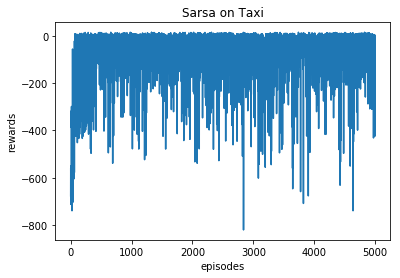

In [7]:
env = gym.make('Taxi-v2')
alpha = 0.7
gamma = 0.99
eps = 0.2
episodes = 5000
steps = 2000
rewards = [0] * episodes
q_table = np.zeros((env.observation_space.n, env.action_space.n))
Sarsa(env, alpha, gamma, eps, episodes, steps, rewards, env.observation_space.n, env.action_space.n, q_table)

plt.plot(rewards)
plt.title('Sarsa on Taxi')
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()